## 2014 - 2016 CitiBike Data Visualization
### Yixuan T
### Nov. 2017

## I.Data Processing 

In [1]:
#from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [13]:
# download the 2014 data
for i in range(1,13):
    if i <10:
        a = '20140' + str(i)
    else:
        a = '2014' + str(i)
    getCitiBikeCSV(a)

('Downloading', '201401')
file in place, you can continue
('Downloading', '201402')
file in place, you can continue
('Downloading', '201403')
file in place, you can continue
('Downloading', '201404')
file in place, you can continue
('Downloading', '201405')
file in place, you can continue
('Downloading', '201406')
file in place, you can continue
('Downloading', '201407')
file in place, you can continue
('Downloading', '201408')
file in place, you can continue
('Downloading', '201409')
file in place, you can continue
('Downloading', '201410')
file in place, you can continue
('Downloading', '201411')
file in place, you can continue
('Downloading', '201412')
file in place, you can continue


In [104]:
# download the 2015 data
for i in range(1,13):
    if i <10:
        a = '20150' + str(i)
    else:
        a = '2015' + str(i)
    getCitiBikeCSV(a)

('Downloading', '201501')
file in place, you can continue
('Downloading', '201502')
file in place, you can continue
('Downloading', '201503')
file in place, you can continue
('Downloading', '201504')
file in place, you can continue
('Downloading', '201505')
file in place, you can continue
('Downloading', '201506')
file in place, you can continue
('Downloading', '201507')
file in place, you can continue
('Downloading', '201508')
file in place, you can continue
('Downloading', '201509')
file in place, you can continue
('Downloading', '201510')
file in place, you can continue
('Downloading', '201511')
file in place, you can continue
('Downloading', '201512')
file in place, you can continue


In [106]:
# download the 2016 data
for i in range(1,13):
    if i <10:
        a = '20160' + str(i)
    else:
        a = '2016' + str(i)
    getCitiBikeCSV(a)

('Downloading', '201601')
file in place, you can continue
('Downloading', '201602')
file in place, you can continue
('Downloading', '201603')
file in place, you can continue
('Downloading', '201604')
file in place, you can continue
('Downloading', '201605')
file in place, you can continue
('Downloading', '201606')
file in place, you can continue
('Downloading', '201607')
file in place, you can continue
('Downloading', '201608')
file in place, you can continue
('Downloading', '201609')
file in place, you can continue
('Downloading', '201610')
file in place, you can continue
('Downloading', '201611')
file in place, you can continue
('Downloading', '201612')
file in place, you can continue


In [5]:
import glob

files = glob.glob('PUIDATA/2014**-citibike-tripdata.csv')

d = {f: sum(1 for line in open(f)) for f in files}

print (pd.Series(d))
print (pd.Series(d).rename('rows').rename_axis('filename').reset_index())

PUIDATA/201401-citibike-tripdata.csv    300401
PUIDATA/201402-citibike-tripdata.csv    224737
PUIDATA/201403-citibike-tripdata.csv    439118
PUIDATA/201404-citibike-tripdata.csv    670781
PUIDATA/201405-citibike-tripdata.csv    866118
PUIDATA/201406-citibike-tripdata.csv    936881
PUIDATA/201407-citibike-tripdata.csv    968843
PUIDATA/201408-citibike-tripdata.csv    963490
PUIDATA/201409-citibike-tripdata.csv    953888
PUIDATA/201410-citibike-tripdata.csv    828712
PUIDATA/201411-citibike-tripdata.csv    529189
PUIDATA/201412-citibike-tripdata.csv    399070
dtype: int64
                                filename    rows
0   PUIDATA/201401-citibike-tripdata.csv  300401
1   PUIDATA/201402-citibike-tripdata.csv  224737
2   PUIDATA/201403-citibike-tripdata.csv  439118
3   PUIDATA/201404-citibike-tripdata.csv  670781
4   PUIDATA/201405-citibike-tripdata.csv  866118
5   PUIDATA/201406-citibike-tripdata.csv  936881
6   PUIDATA/201407-citibike-tripdata.csv  968843
7   PUIDATA/201408-citibike-tri

In [105]:
files = glob.glob('PUIDATA/2015**-citibike-tripdata.csv')

d2015 = {f: sum(1 for line in open(f)) for f in files}

print (pd.Series(d2015))
print (pd.Series(d2015).rename('rows').rename_axis('filename').reset_index())

PUIDATA/201501-citibike-tripdata.csv     285553
PUIDATA/201502-citibike-tripdata.csv     196931
PUIDATA/201503-citibike-tripdata.csv     341827
PUIDATA/201504-citibike-tripdata.csv     652391
PUIDATA/201505-citibike-tripdata.csv     961987
PUIDATA/201506-citibike-tripdata.csv     941220
PUIDATA/201507-citibike-tripdata.csv    1085677
PUIDATA/201508-citibike-tripdata.csv    1179045
PUIDATA/201509-citibike-tripdata.csv    1289700
PUIDATA/201510-citibike-tripdata.csv    1212278
PUIDATA/201511-citibike-tripdata.csv     987246
PUIDATA/201512-citibike-tripdata.csv     804126
dtype: int64
                                filename     rows
0   PUIDATA/201501-citibike-tripdata.csv   285553
1   PUIDATA/201502-citibike-tripdata.csv   196931
2   PUIDATA/201503-citibike-tripdata.csv   341827
3   PUIDATA/201504-citibike-tripdata.csv   652391
4   PUIDATA/201505-citibike-tripdata.csv   961987
5   PUIDATA/201506-citibike-tripdata.csv   941220
6   PUIDATA/201507-citibike-tripdata.csv  1085677
7   PUIDATA

In [118]:
files = glob.glob('PUIDATA/2016**-citibike-tripdata.csv')

d2016 = {f: sum(1 for line in open(f)) for f in files}

print (pd.Series(d2016))
print (pd.Series(d2016).rename('rows').rename_axis('filename').reset_index())

PUIDATA/201601-citibike-tripdata.csv     509479
PUIDATA/201602-citibike-tripdata.csv     560875
PUIDATA/201603-citibike-tripdata.csv     919922
PUIDATA/201604-citibike-tripdata.csv    1013150
PUIDATA/201605-citibike-tripdata.csv    1212281
PUIDATA/201606-citibike-tripdata.csv    1460319
PUIDATA/201607-citibike-tripdata.csv    1380111
PUIDATA/201608-citibike-tripdata.csv    1557664
PUIDATA/201609-citibike-tripdata.csv    1648857
PUIDATA/201610-citibike-tripdata.csv    1573873
PUIDATA/201611-citibike-tripdata.csv    1196943
PUIDATA/201612-citibike-tripdata.csv     812193
dtype: int64
                                filename     rows
0   PUIDATA/201601-citibike-tripdata.csv   509479
1   PUIDATA/201602-citibike-tripdata.csv   560875
2   PUIDATA/201603-citibike-tripdata.csv   919922
3   PUIDATA/201604-citibike-tripdata.csv  1013150
4   PUIDATA/201605-citibike-tripdata.csv  1212281
5   PUIDATA/201606-citibike-tripdata.csv  1460319
6   PUIDATA/201607-citibike-tripdata.csv  1380111
7   PUIDATA

In [26]:
data = pd.Series(d).rename('counts').rename_axis('filename').reset_index()

In [28]:
data.index = data.index + 1

,filename,counts
1,PUIDATA/201401-citibike-tripdata.csv,300401
2,PUIDATA/201402-citibike-tripdata.csv,224737
3,PUIDATA/201403-citibike-tripdata.csv,439118
4,PUIDATA/201404-citibike-tripdata.csv,670781
5,PUIDATA/201405-citibike-tripdata.csv,866118
6,PUIDATA/201406-citibike-tripdata.csv,936881
7,PUIDATA/201407-citibike-tripdata.csv,968843
8,PUIDATA/201408-citibike-tripdata.csv,963490
9,PUIDATA/201409-citibike-tripdata.csv,953888
10,PUIDATA/201410-citibike-tripdata.csv,828712


In [29]:
data.reset_index(inplace = True)

In [30]:
data.columns = ['month','filename','counts']
data

,month,filename,counts
0,1,PUIDATA/201401-citibike-tripdata.csv,300401
1,2,PUIDATA/201402-citibike-tripdata.csv,224737
2,3,PUIDATA/201403-citibike-tripdata.csv,439118
3,4,PUIDATA/201404-citibike-tripdata.csv,670781
4,5,PUIDATA/201405-citibike-tripdata.csv,866118
5,6,PUIDATA/201406-citibike-tripdata.csv,936881
6,7,PUIDATA/201407-citibike-tripdata.csv,968843
7,8,PUIDATA/201408-citibike-tripdata.csv,963490
8,9,PUIDATA/201409-citibike-tripdata.csv,953888
9,10,PUIDATA/201410-citibike-tripdata.csv,828712


In [41]:
data['counts'] = pd.Series(data['counts']).convert_objects(convert_numeric=True)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [108]:
data15 = pd.Series(d2015).rename('counts').rename_axis('filename').reset_index()

In [109]:
data15.index = data15.index + 1

In [110]:
data15.reset_index(inplace = True)
data15.columns = ['month','filename','counts']
data15

,month,filename,counts
0,1,PUIDATA/201501-citibike-tripdata.csv,285553
1,2,PUIDATA/201502-citibike-tripdata.csv,196931
2,3,PUIDATA/201503-citibike-tripdata.csv,341827
3,4,PUIDATA/201504-citibike-tripdata.csv,652391
4,5,PUIDATA/201505-citibike-tripdata.csv,961987
5,6,PUIDATA/201506-citibike-tripdata.csv,941220
6,7,PUIDATA/201507-citibike-tripdata.csv,1085677
7,8,PUIDATA/201508-citibike-tripdata.csv,1179045
8,9,PUIDATA/201509-citibike-tripdata.csv,1289700
9,10,PUIDATA/201510-citibike-tripdata.csv,1212278


In [152]:
data16 = pd.Series(d2016).rename('counts').rename_axis('filename').reset_index()

In [153]:
data16.index = data16.index + 1

In [154]:
data16.reset_index(inplace = True)
data16.columns = ['month','filename','counts']
data16

,month,filename,counts
0,1,PUIDATA/201601-citibike-tripdata.csv,509479
1,2,PUIDATA/201602-citibike-tripdata.csv,560875
2,3,PUIDATA/201603-citibike-tripdata.csv,919922
3,4,PUIDATA/201604-citibike-tripdata.csv,1013150
4,5,PUIDATA/201605-citibike-tripdata.csv,1212281
5,6,PUIDATA/201606-citibike-tripdata.csv,1460319
6,7,PUIDATA/201607-citibike-tripdata.csv,1380111
7,8,PUIDATA/201608-citibike-tripdata.csv,1557664
8,9,PUIDATA/201609-citibike-tripdata.csv,1648857
9,10,PUIDATA/201610-citibike-tripdata.csv,1573873


## II.Merge Year Data

In [173]:
#2014
fout=open("merge2014.csv","a") #create a new csv file to store data
# first file:
for line in open("PUIDATA/201401-citibike-tripdata.csv"):
    fout.write(line)
# now the rest:    
for i in range(2,13):
    if i <10:
        f = open("PUIDATA/20140"+str(i)+"-citibike-tripdata.csv")
    else:
        f = open("PUIDATA/2014"+str(i)+"-citibike-tripdata.csv")    
    f.next() # skip the header
    for line in f:
         fout.write(line)
    f.close() # not really needed
fout.close()

In [196]:
#2015
fout=open("merge2015.csv","a") #create a new csv file to store data
# first file:
for line in open("PUIDATA/201501-citibike-tripdata.csv"):
    fout.write(line)
# now the rest:    
for i in range(2,13):
    if i <10:
        f = open("PUIDATA/20150"+str(i)+"-citibike-tripdata.csv")
    else:
        f = open("PUIDATA/2015"+str(i)+"-citibike-tripdata.csv")    
    f.next() # skip the header
    for line in f:
         fout.write(line)
    f.close() # not really needed
fout.close()

In [197]:
#2016
fout=open("merge2016.csv","a") #create a new csv file to store data
# first file:
for line in open("PUIDATA/201601-citibike-tripdata.csv"):
    fout.write(line)
# now the rest:    
for i in range(2,13):
    if i <10:
        f = open("PUIDATA/20160"+str(i)+"-citibike-tripdata.csv")
    else:
        f = open("PUIDATA/2016"+str(i)+"-citibike-tripdata.csv")    
    f.next() # skip the header
    for line in f:
         fout.write(line)
    f.close() # not really needed
fout.close()

In [175]:
Year14 = pd.read_csv('merge2014.csv')

In [176]:
Year14.shape

(8081216, 15)

In [177]:
Year14.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [178]:
#select what we need
T2014 = Year14[['starttime']]

In [179]:
#transform format
T2014['starttime'] = pd.to_datetime(T2014['starttime']) #takes 15mins to run this ..
T2014.head()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,starttime
0,2014-01-01 00:00:06
1,2014-01-01 00:00:38
2,2014-01-01 00:03:59
3,2014-01-01 00:05:15
4,2014-01-01 00:05:18


In [212]:
T2014.to_csv('T2014.csv') #store for future use

In [199]:
Year15 = pd.read_csv('merge2015.csv')

In [200]:
Year15.shape

(9937969, 15)

In [201]:
Year15.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [202]:
#select what we need
T2015 = Year15[['starttime']]

In [203]:
#transform format
T2015['starttime'] = pd.to_datetime(T2015['starttime']) #takes 50mins to run this ..
T2015.head()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,starttime
0,2015-01-01 00:01:00
1,2015-01-01 00:02:00
2,2015-01-01 00:04:00
3,2015-01-01 00:04:00
4,2015-01-01 00:05:00


In [213]:
T2015.to_csv('T2015.csv') #store for future use

In [204]:
Year16 = pd.read_csv('merge2016.csv')

In [205]:
Year16.shape

(13845655, 15)

In [206]:
Year16.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [207]:
#select what we need
T2016 = Year16[['starttime']]

In [233]:
#transform format
T2016['starttime'] = pd.to_datetime(T2016['starttime']) #takes 50mins to run this ..
T2016.head()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,starttime
0,2016-01-01 00:00:41
1,2016-01-01 00:00:45
2,2016-01-01 00:00:48
3,2016-01-01 00:01:06
4,2016-01-01 00:01:12


In [239]:
T2016.to_csv('T2016.csv') #store for future use

## III.Visualization - yearly

In [183]:
pl.set

Object `pl.set_ticklabels` not found.


In [299]:
y = T2014['starttime'].groupby([T2014['starttime'].dt.hour]).count()
x = numpy.arange(24)

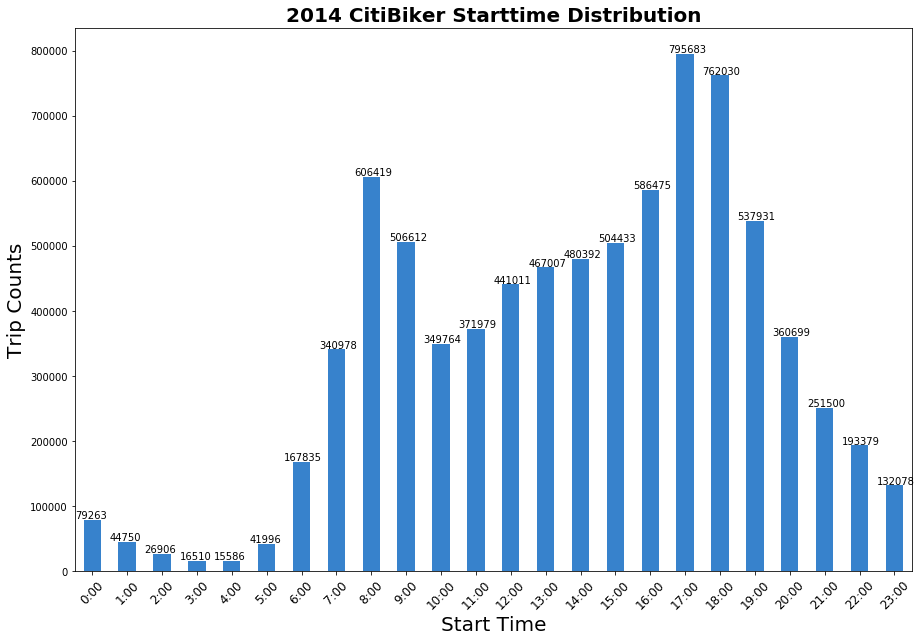

In [300]:
#2014 absolute number 
fig = pl.figure(figsize(15,10))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
ax = ((T2014['starttime'].groupby([T2014['starttime'].dt.hour]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='#3782CC')

for i,j in zip(x,y):
    ax.annotate(str(j),xy=(i-0.5,j+2000))

ax.xaxis.set_ticklabels(['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00','7:00','8:00','9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00',\
                               '18:00','19:00','20:00','21:00','22:00','23:00'], fontsize=12, rotation=45)

pl.xlabel("Start Time", fontsize=20)
pl.ylabel("Trip Counts", fontsize=20)
plt.title("2014 CitiBiker Starttime Distribution",fontsize = 20,weight = 'bold')
pl.show()
fig.savefig('CB2014Dtime.png')

### Figure1.Distribution of Citibikers' starttime 2014 
The two peak of citibike users ride is 8:00-9:00AM and 17:00 - 18:00.

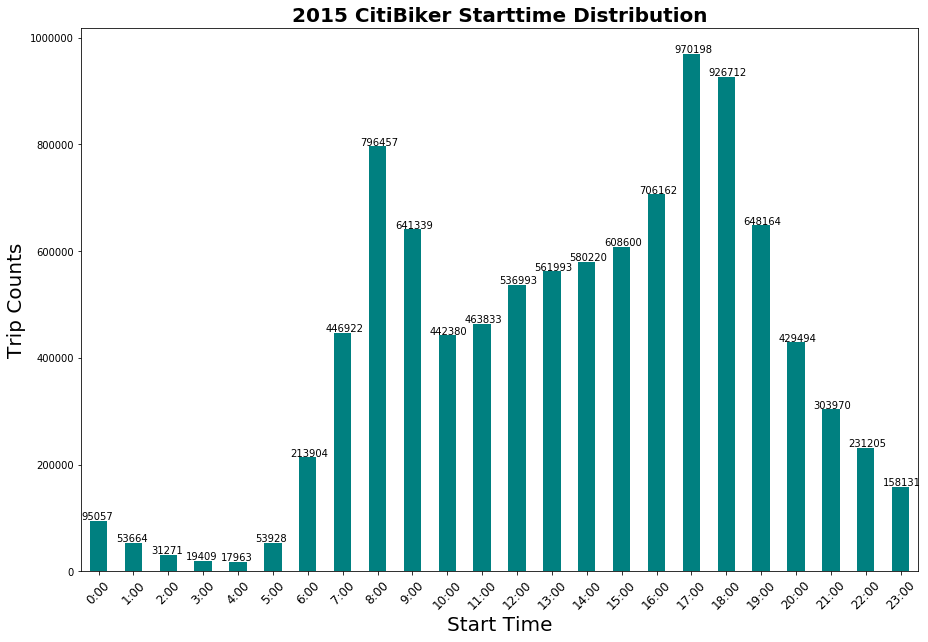

In [301]:
#2015 absolute number 
fig = pl.figure(figsize(15,10))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
ax = ((T2015['starttime'].groupby([T2015['starttime'].dt.hour]).count()) / norm_w).plot(kind="bar", color='teal')

y = T2015['starttime'].groupby([T2015['starttime'].dt.hour]).count()

for i,j in zip(x,y):
    ax.annotate(str(j),xy=(i-0.5,j+2000))

ax.xaxis.set_ticklabels(['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00','7:00','8:00','9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00',\
                               '18:00','19:00','20:00','21:00','22:00','23:00'], fontsize=12, rotation=45)

pl.xlabel("Start Time", fontsize=20)
pl.ylabel("Trip Counts", fontsize=20)
plt.title("2015 CitiBiker Starttime Distribution",fontsize = 20,weight = 'bold')
pl.show()
fig.savefig('2015DTime.png')

### Figure2.Distribution of Citibikers' starttime 2015
The two peak of citibike users ride is 8:00-9:00AM and 17:00 - 18:00.

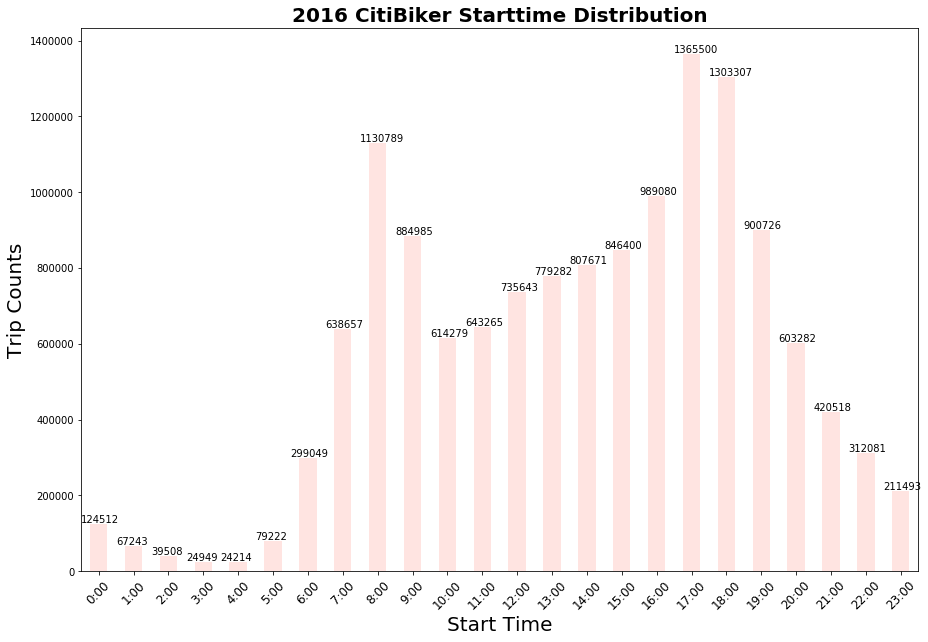

In [302]:
#2016 absolute number 
fig = pl.figure(figsize(15,10))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
ax = ((T2016['starttime'].groupby([T2016['starttime'].dt.hour]).count()) / norm_w).plot(kind="bar", color='mistyrose')

y = T2016['starttime'].groupby([T2016['starttime'].dt.hour]).count()

for i,j in zip(x,y):
    ax.annotate(str(j),xy=(i-0.5,j+4000))

ax.xaxis.set_ticklabels(['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00','7:00','8:00','9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00',\
                               '18:00','19:00','20:00','21:00','22:00','23:00'], fontsize=12, rotation=45)

pl.xlabel("Start Time", fontsize=20)
pl.ylabel("Trip Counts", fontsize=20)
plt.title("2016 CitiBiker Starttime Distribution",fontsize = 20,weight = 'bold')
pl.show()
fig.savefig('CB2016DTime.png')

### Figure3.Distribution of Citibikers' starttime 2016
The two peak of citibike users ride is 8:00-9:00AM and 17:00 - 18:00.

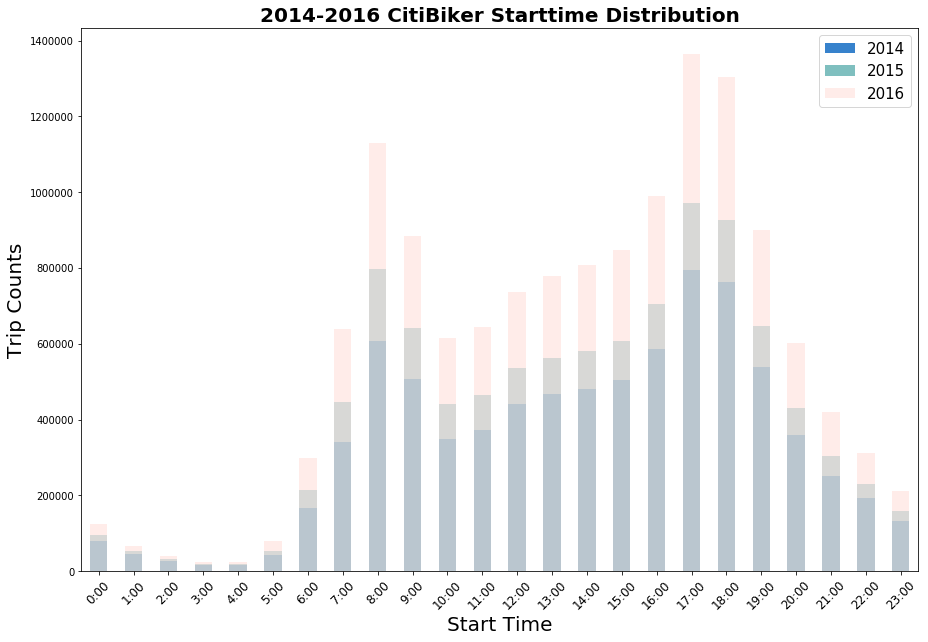

In [407]:
#plot together to see the difference
fig = pl.figure(figsize(15,10))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
ax = ((T2014['starttime'].groupby([T2014['starttime'].dt.hour]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='#3782CC', label = '2014')

ax1 = ((T2015['starttime'].groupby([T2015['starttime'].dt.hour]).count()) / norm_w).plot(kind="bar", color='teal',
                                                                                         alpha = 0.5, label = '2015')

ax = ((T2016['starttime'].groupby([T2016['starttime'].dt.hour]).count()) / norm_w).plot(kind="bar", color='mistyrose',
                                                                                       alpha = 0.7, label = '2016')

ax.xaxis.set_ticklabels(['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00','7:00','8:00','9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00',\
                               '18:00','19:00','20:00','21:00','22:00','23:00'], fontsize=12, rotation=45)

pl.xlabel("Start Time", fontsize=20)
pl.ylabel("Trip Counts", fontsize=20)
plt.title("2014-2016 CitiBiker Starttime Distribution",fontsize = 20,weight = 'bold')
pl.legend(fontsize = 15)
pl.show()
fig.savefig('CB2014-2016DTime.png', dpi=100)

### Figure4.Distribution of Citibikers' starttime 2014 - 2016
Combine the three year data, we can conclude that the two peak of citibike users ride is 8:00-9:00AM and 17:00 - 18:00.

* descriptive stats, eg. mean / standard deviation

In [341]:
data.head()

,month,filename,counts
0,1,PUIDATA/201401-citibike-tripdata.csv,300401
1,2,PUIDATA/201402-citibike-tripdata.csv,224737
2,3,PUIDATA/201403-citibike-tripdata.csv,439118
3,4,PUIDATA/201404-citibike-tripdata.csv,670781
4,5,PUIDATA/201405-citibike-tripdata.csv,866118


In [318]:
data.counts.describe()

count        12.000000
mean     673435.666667
std      281581.891388
min      224737.000000
25%      429106.000000
50%      749746.500000
75%      941132.750000
max      968843.000000
Name: counts, dtype: float64

In [333]:
a = data.counts.describe()
print('The mean trip counts in 2014 each month is %d'%a[1], 'and std is %d'%a[2])

('The mean trip counts in 2014 each month is 673435', 'and std is 281581')


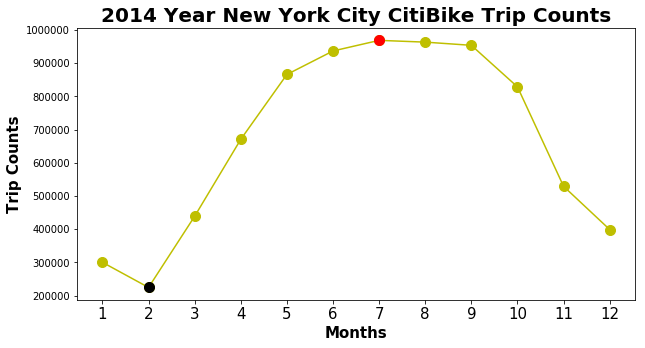

In [294]:
#2014
fig1 = plt.figure(figsize(10,5))

plt.plot(data.month, data.counts,'yo-', markersize = 10 )
plt.plot(data.month[data.counts == max(data.counts)],max(data.counts), 'ro', markersize = 10)
plt.plot(data.month[data.counts == min(data.counts)],min(data.counts), 'ko', markersize = 10)
plt.xticks(data.month, data.month, fontsize = 15)
plt.xlabel("Months",fontsize = 15,weight = 'bold')
plt.ylabel("Trip Counts",fontsize = 15,weight = 'bold')
plt.title("2014 Year New York City CitiBike Trip Counts",fontsize = 20,weight = 'bold')
plt.show()
fig1.savefig('14Mcounts.png', dpi=100)

### Figure5.2014 Year New York City CitiBike Trip Counts
The red dot indicates that July has the highest Citi Bike trip counts, the black dot indicates that February has the highest Citi Bike trip counts, and this plot also indicates number of summer trips are higher than winter trips.

In [335]:
b = data15.counts.describe()
print('The mean trip counts in 2015 each month is %d'%b[1], 'and std is %d'%b[2])

('The mean trip counts in 2015 each month is 828165', 'and std is 377415')


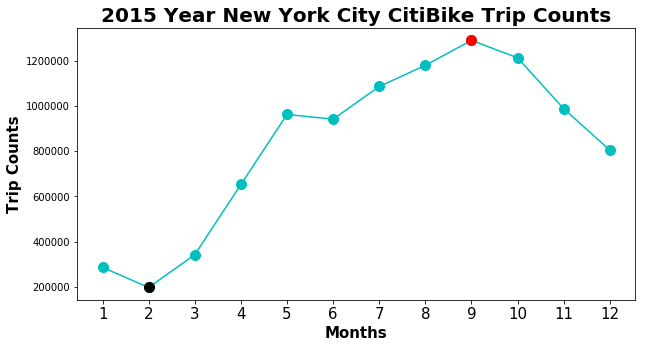

In [280]:
#2015
fig2 = plt.figure(figsize(10,5))
plt.plot(data15.month, data15.counts,'co-', markersize = 10 )
plt.plot(data15.month[data15.counts == max(data15.counts)],max(data15.counts), 'ro', markersize = 10)
plt.plot(data15.month[data15.counts == min(data15.counts)],min(data15.counts), 'ko', markersize = 10)
plt.xticks(data15.month, data15.month, fontsize = 15)
plt.xlabel("Months",fontsize = 15,weight = 'bold')
plt.ylabel("Trip Counts",fontsize = 15,weight = 'bold')
plt.title("2015 Year New York City CitiBike Trip Counts",fontsize = 20,weight = 'bold')
plt.show()
fig2.savefig('15Mcounts.png')

### Figure6.2015 Year New York City CitiBike Trip Counts
The red dot indicates that September has the highest Citi Bike trip counts, the black dot indicates that Ferbuary has the highest Citi Bike trip counts, and this plot also indicates number of summer trips are higher than winter trips.

In [336]:
c = data16.counts.describe()
print('The mean trip counts in 2016 each month is %d'%c[1], 'and std is %d'%c[2])

('The mean trip counts in 2016 each month is 1153805', 'and std is 392310')


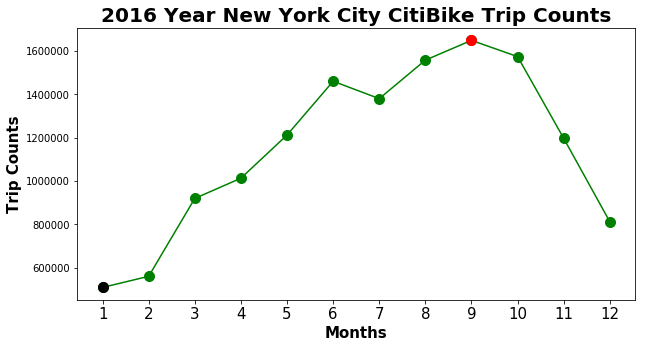

In [281]:
#2016
fig3 = plt.figure(figsize(10,5))
plt.plot(data16.month, data16.counts,'go-', markersize = 10 )
plt.plot(data16.month[data16.counts == max(data16.counts)],max(data16.counts), 'ro', markersize = 10)
plt.plot(data16.month[data16.counts == min(data16.counts)],min(data16.counts), 'ko', markersize = 10)
plt.xticks(data16.month, data16.month, fontsize = 15)
plt.xlabel("Months",fontsize = 15,weight = 'bold')
plt.ylabel("Trip Counts",fontsize = 15,weight = 'bold')
plt.title("2016 Year New York City CitiBike Trip Counts",fontsize = 20,weight = 'bold')
plt.show()
fig3.savefig('16Mcounts.png')

### Figure7.2016 Year New York City CitiBike Trip Counts
The red dot indicates that September has the highest Citi Bike trip counts, the black dot indicates that January has the highest Citi Bike trip counts, and this plot also indicates number of summer trips are higher than winter trips.

In [338]:
a = data.counts.describe()
print('The mean trip counts in 2014 each month is %d'%a[1], 'and std is %d'%a[2])
b = data15.counts.describe()
print('The mean trip counts in 2015 each month is %d'%b[1], 'and std is %d'%b[2])
c = data16.counts.describe()
print('The mean trip counts in 2016 each month is %d'%c[1], 'and std is %d'%c[2])

('The mean trip counts in 2014 each month is 673435', 'and std is 281581')
('The mean trip counts in 2015 each month is 828165', 'and std is 377415')
('The mean trip counts in 2016 each month is 1153805', 'and std is 392310')


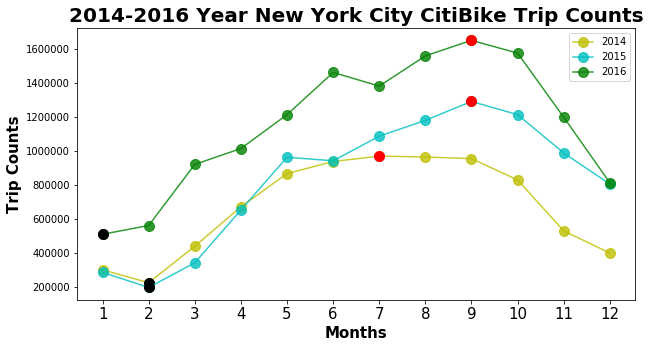

In [282]:
#2014-2016
fig4 = plt.figure(figsize(10,5))
plt.plot(data.month, data.counts,'yo-', markersize = 10, alpha = 0.8, label = '2014' )
plt.plot(data.month[data.counts == max(data.counts)],max(data.counts), 'ro', markersize = 10)
plt.plot(data.month[data.counts == min(data.counts)],min(data.counts), 'ko', markersize = 10)

plt.plot(data15.month, data15.counts,'co-', markersize = 10, alpha = 0.8, label = '2015'  )
plt.plot(data15.month[data15.counts == max(data15.counts)],max(data15.counts), 'ro', markersize = 10)
plt.plot(data15.month[data15.counts == min(data15.counts)],min(data15.counts), 'ko', markersize = 10)

plt.plot(data16.month, data16.counts,'go-', markersize = 10, alpha = 0.8, label = '2016')
plt.plot(data16.month[data16.counts == max(data16.counts)],max(data16.counts), 'ro', markersize = 10)
plt.plot(data16.month[data16.counts == min(data16.counts)],min(data16.counts), 'ko', markersize = 10)

plt.xticks(data.month, data.month, fontsize = 15 )
plt.xlabel("Months",fontsize = 15,weight = 'bold')
plt.ylabel("Trip Counts",fontsize = 15,weight = 'bold')
plt.title("2014-2016 Year New York City CitiBike Trip Counts",fontsize = 20,weight = 'bold')
plt.legend()
plt.show()
fig4.savefig('2014-2016Mcounts.png')

### Figure8.2014 - 2016 New York City CitiBike Trip Counts
The yellow line represents 2014 Citi Bike trip counts, the blue line represents 2015 Citi Bike trip counts, the green line represents 2016 Citi Bike trip counts.

The red dot represents the month with highest trip count in that year, and the black dot represents the month with lowest trip counts in that year.

This plot shows the number of CitiBike trips are increasing yearly through 2014 - 2016.

In [378]:
test = T2016

In [380]:
test['month'] = test['starttime'].dt.month

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [382]:
test = test[test['month'] == 1]

In [398]:
test['weekday'] = test['starttime'].dt.weekday
test['day'] = test['starttime'].dt.day

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [440]:
test = test[test['day'] <=14]
test

,starttime,month,day,weekday
0,2016-01-01 00:00:41,1,1,4
1,2016-01-01 00:00:45,1,1,4
2,2016-01-01 00:00:48,1,1,4
3,2016-01-01 00:01:06,1,1,4
4,2016-01-01 00:01:12,1,1,4
5,2016-01-01 00:01:19,1,1,4
6,2016-01-01 00:01:27,1,1,4
7,2016-01-01 00:02:18,1,1,4
8,2016-01-01 00:03:12,1,1,4
9,2016-01-01 00:03:43,1,1,4


#### Split into two weeks

In [438]:
week1 = test[test['day'] <= 7 ]

In [444]:
week2 = test[test['day'] > 7 ]

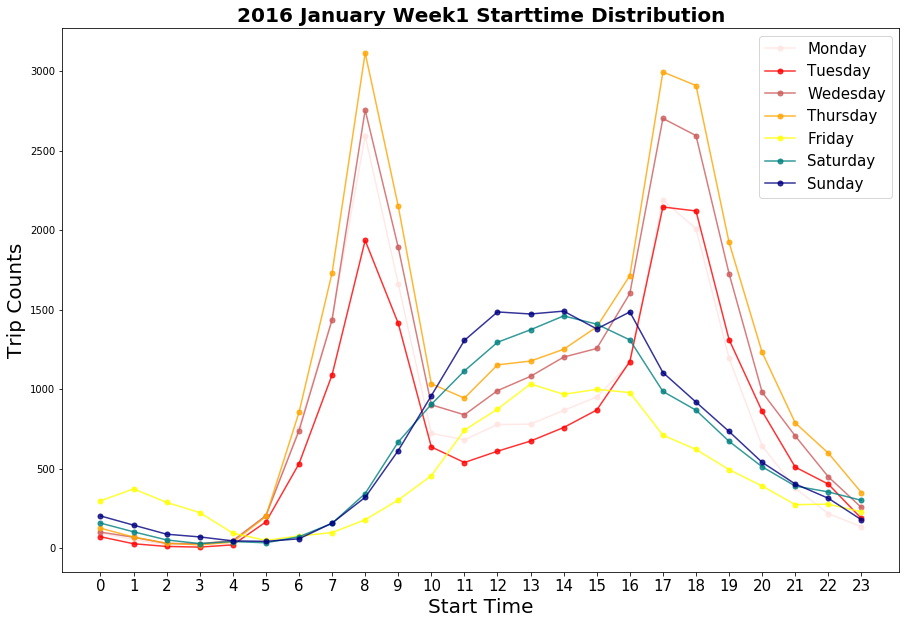

In [434]:
#week1 plot
fig = pl.figure(figsize(15,10))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
plt.plot(x, week1[week1['weekday'] == 0]['starttime'].groupby([week1['starttime'].dt.hour]).count(),'.-', markersize = 10, alpha = 0.8, color = 'mistyrose',
        label = 'Monday')
plt.plot(x, week1[week1['weekday'] == 1]['starttime'].groupby([week1['starttime'].dt.hour]).count(),'.-', markersize = 10, alpha = 0.8, color = 'red',
        label = 'Tuesday')
plt.plot(x, week1[week1['weekday'] == 2]['starttime'].groupby([week1['starttime'].dt.hour]).count(),'.-', markersize = 10, alpha = 0.8, color = 'Indianred',
        label = 'Wedesday')
plt.plot(x, week1[week1['weekday'] == 3]['starttime'].groupby([week1['starttime'].dt.hour]).count(),'.-', markersize = 10, alpha = 0.8, color = 'orange',
        label = 'Thursday')
plt.plot(x, week1[week1['weekday'] == 4]['starttime'].groupby([week1['starttime'].dt.hour]).count(),'.-', markersize = 10, alpha = 0.8, color = 'yellow',
        label = 'Friday')
plt.plot(x, week1[week1['weekday'] == 5]['starttime'].groupby([week1['starttime'].dt.hour]).count(),'.-', markersize = 10, alpha = 0.8, color = 'teal',
        label = 'Saturday')
plt.plot(x, week1[week1['weekday'] == 6]['starttime'].groupby([week1['starttime'].dt.hour]).count(),'.-', markersize = 10, alpha = 0.8, color = 'navy',
        label = 'Sunday')

plt.xticks(x, x, fontsize = 15 )
pl.xlabel("Start Time", fontsize=20)
pl.ylabel("Trip Counts", fontsize=20)
pl.title("2016 January Week1 Starttime Distribution",fontsize = 20,weight = 'bold')
pl.legend(fontsize = 15)
pl.show()
fig.savefig('2016JanWeek1_starttime.png')

### Figure9.  line graph of start time in the first week 2016. This would be helpful to show how ridership varies by hour of day and day of week.
We can read from this plot that the peak hour in weekdays is between 7:00 - 9:00AM, and the peak hour in weekends is around noon. Specifically, January 1th(Monday) is a holiday, so in that day, the trip counts is mostly lower than others, and the biker pattern is like the weekends.


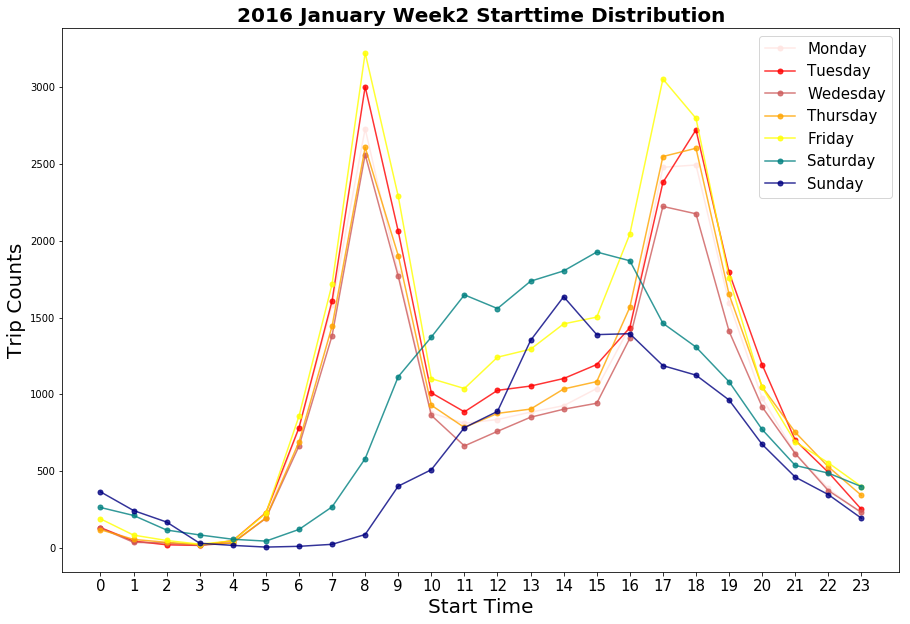

In [436]:
#week2 plot
fig = pl.figure(figsize(15,10))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
plt.plot(x, week2[week2['weekday'] == 0]['starttime'].groupby([week2['starttime'].dt.hour]).count(),'.-', markersize = 10, alpha = 0.8, color = 'mistyrose',
        label = 'Monday')
plt.plot(x, week2[week2['weekday'] == 1]['starttime'].groupby([week2['starttime'].dt.hour]).count(),'.-', markersize = 10, alpha = 0.8, color = 'red',
        label = 'Tuesday')
plt.plot(x, week2[week2['weekday'] == 2]['starttime'].groupby([week2['starttime'].dt.hour]).count(),'.-', markersize = 10, alpha = 0.8, color = 'Indianred',
        label = 'Wedesday')
plt.plot(x, week2[week2['weekday'] == 3]['starttime'].groupby([week2['starttime'].dt.hour]).count(),'.-', markersize = 10, alpha = 0.8, color = 'orange',
        label = 'Thursday')
plt.plot(x, week2[week2['weekday'] == 4]['starttime'].groupby([week2['starttime'].dt.hour]).count(),'.-', markersize = 10, alpha = 0.8, color = 'yellow',
        label = 'Friday')
plt.plot(x, week2[week2['weekday'] == 5]['starttime'].groupby([week2['starttime'].dt.hour]).count(),'.-', markersize = 10, alpha = 0.8, color = 'teal',
        label = 'Saturday')
plt.plot(x, week2[week2['weekday'] == 6]['starttime'].groupby([week2['starttime'].dt.hour]).count(),'.-', markersize = 10, alpha = 0.8, color = 'navy',
        label = 'Sunday')

plt.xticks(x, x, fontsize = 15 )
pl.xlabel("Start Time", fontsize=20)
pl.ylabel("Trip Counts", fontsize=20)
pl.title("2016 January Week2 Starttime Distribution",fontsize = 20,weight = 'bold')
pl.legend(fontsize = 15)
pl.show()
fig.savefig('2016JanWeek2_starttime.png')

### Figure10.  line graph of start time in the second week 2016. This would be helpful to show how ridership varies by hour of day and day of week.
We can read from this plot that the peak hour in weekdays is between 7:00 - 9:00AM, and the peak hour in weekends is around noon.

In [365]:
#merge 3 year data
Mdf = data15.merge(data, left_on='month', right_on='month')
Mdf = Mdf.merge(data16, left_on='month', right_on='month')

In [366]:
Mdf = Mdf[['month', 'counts_x', 'counts_y', 'counts']]
Mdf.columns = ['month', '2014counts', '2015counts', '2016counts']
Mdf.head()

,month,2014counts,2015counts,2016counts
0,1,285553,300401,509479
1,2,196931,224737,560875
2,3,341827,439118,919922
3,4,652391,670781,1013150
4,5,961987,866118,1212281


In [447]:
Mdf['Average'] = (Mdf['2014counts'] + Mdf['2015counts'] + Mdf['2016counts']) // 3
Mdf.Average

0      365144
1      327514
2      566955
3      778774
4     1013462
5     1112806
6     1144877
7     1233399
8     1297481
9     1204954
10     904459
11     671796
Name: Average, dtype: int64

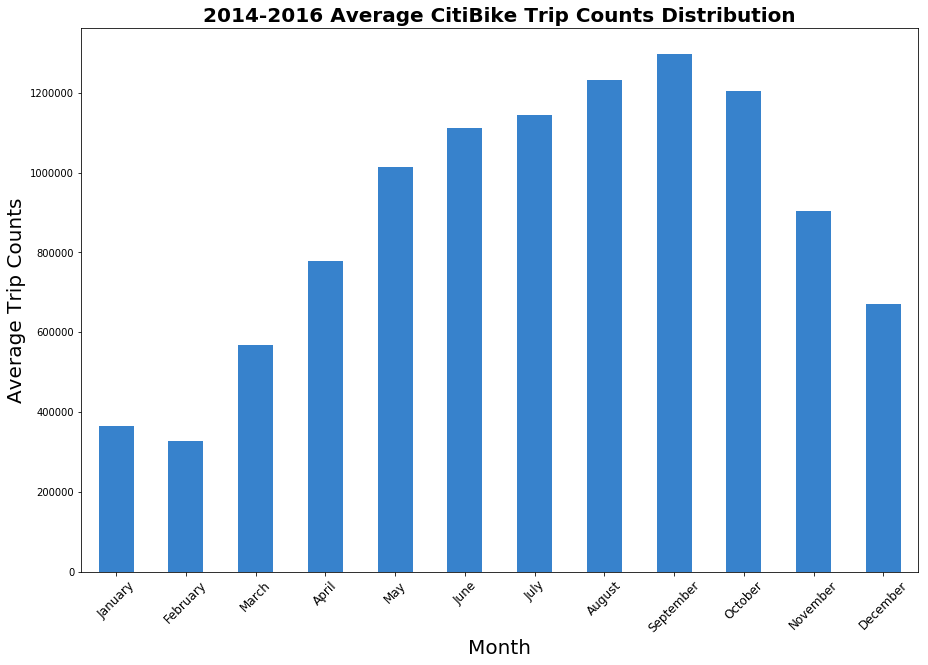

In [363]:

fig = pl.figure(figsize(15,10))

ax = (Mdf['Average']).plot(kind="bar", color='#3782CC')

#for i,j in zip(x,y):
#    ax.annotate(str(j),xy=(i-0.5,j+2000))

ax.xaxis.set_ticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September','October','November','December'],
                        fontsize=12, rotation=45)

pl.xlabel("Month", fontsize=20)
pl.ylabel("Average Trip Counts", fontsize=20)
plt.title("2014-2016 Average CitiBike Trip Counts Distribution",fontsize = 20,weight = 'bold')
pl.show()
fig.savefig('CB14-16Ave.png')

### Figure11.Bar chart of the three year averages for each month.

### one more thing.. A Rough Look at NYC Census Tracts

In [339]:
ct = pd.read_csv('nyct2010.csv')
ct.head()

,BoroCode,the_geom,BoroName,CTLabel,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape_Leng,Shape_Area
0,5,MULTIPOLYGON (((-74.07920577013245 40.64343078...,Staten Island,9.0,900,5000900,I,SI22,West New Brighton-New Brighton-St. George,3903,7729.016794,2.497010e+06
1,1,MULTIPOLYGON (((-73.96432543478758 40.75638153...,Manhattan,98.0,9800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.199811,1.906016e+06
2,1,MULTIPOLYGON (((-73.96802436915851 40.75957814...,Manhattan,100.0,10000,1010000,I,MN19,Turtle Bay-East Midtown,3808,5692.168737,1.860938e+06
3,1,MULTIPOLYGON (((-73.97124277307127 40.76093641...,Manhattan,102.0,10200,1010200,I,MN17,Midtown-Midtown South,3807,5687.802439,1.860993e+06
4,1,MULTIPOLYGON (((-73.97445730550224 40.76229308...,Manhattan,104.0,10400,1010400,I,MN17,Midtown-Midtown South,3807,5693.036367,1.864600e+06


In [340]:
ct.columns

Index([u'BoroCode', u'the_geom', u'BoroName', u'CTLabel', u'CT2010',
       u'BoroCT2010', u'CDEligibil', u'NTACode', u'NTAName', u'PUMA',
       u'Shape_Leng', u'Shape_Area'],
      dtype='object')